In [32]:
import mne
import matplotlib.pyplot as plt

filePath = "/Users/jonathan/Documents/coding/alljoined/stimulus-emotiv/recordings/subj_3/session_1/block_3/Subject 3, Session 1, Block 1 Recording_FLEX2_213075_2024.05.07T12.16.39.07.00.json"
raw = mne.io.read_raw_edf(filePath, preload=True)

NotImplementedError: Only EDF files are supported, got json.

In [27]:
raw.info

Measurement date,"May 07, 2024 12:16:39 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,127 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


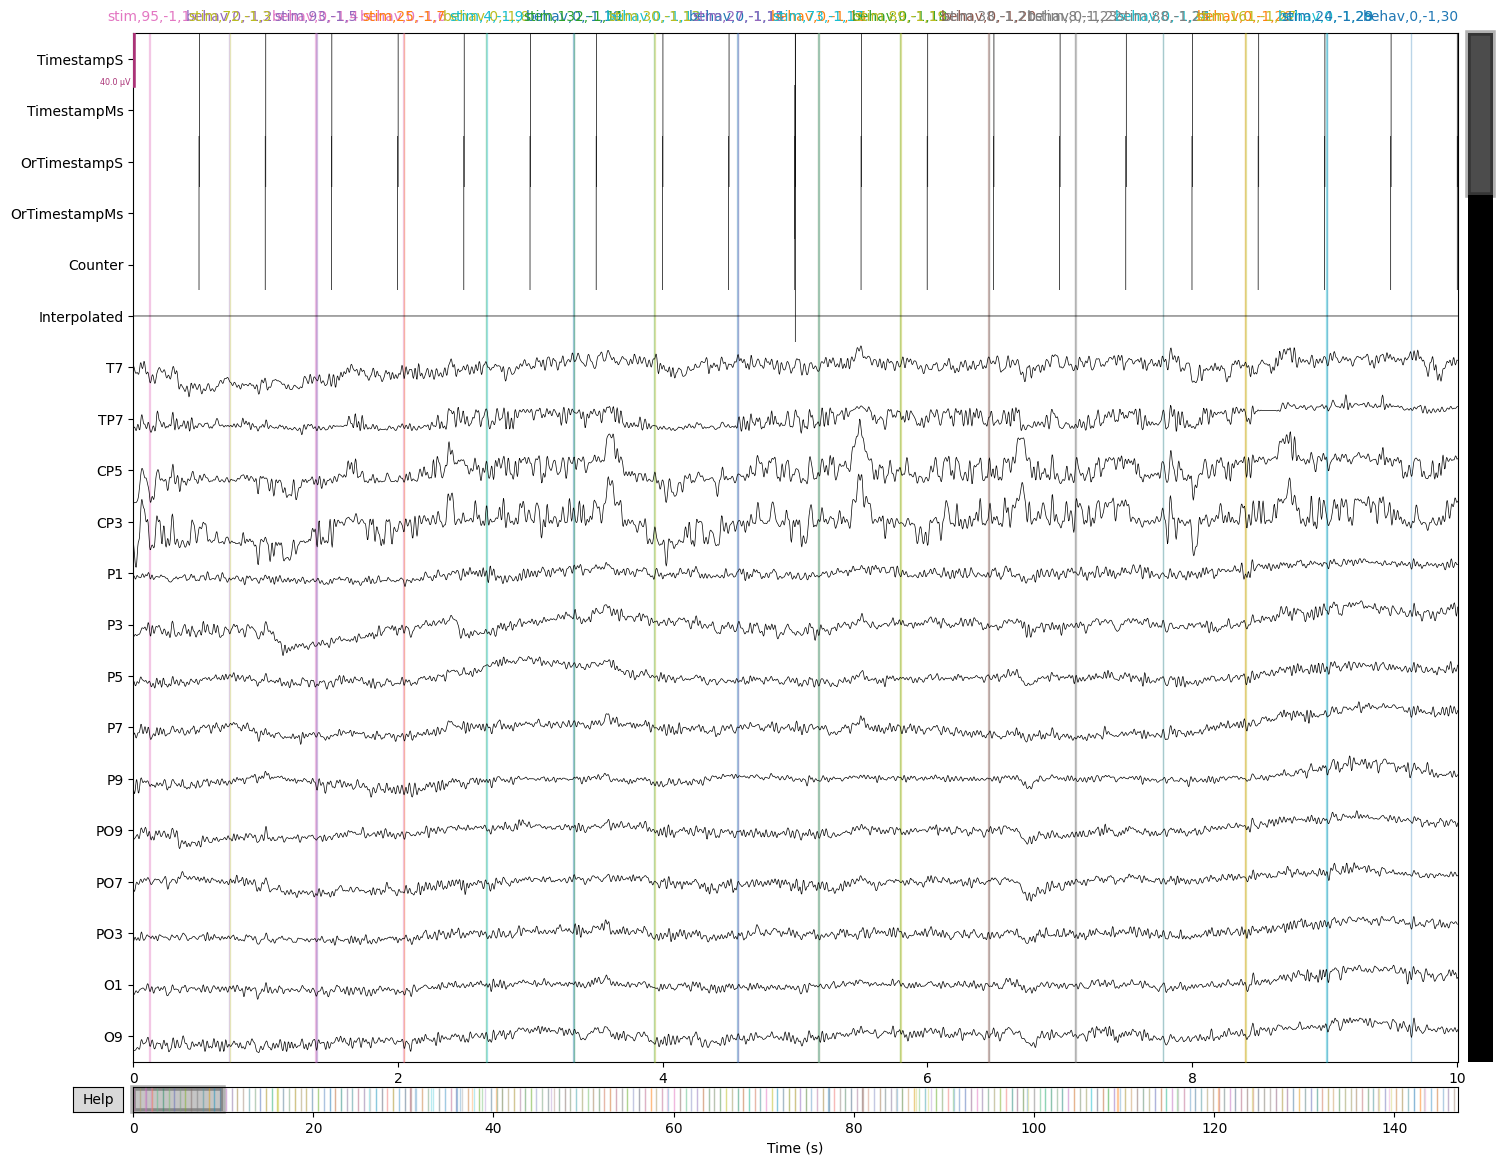

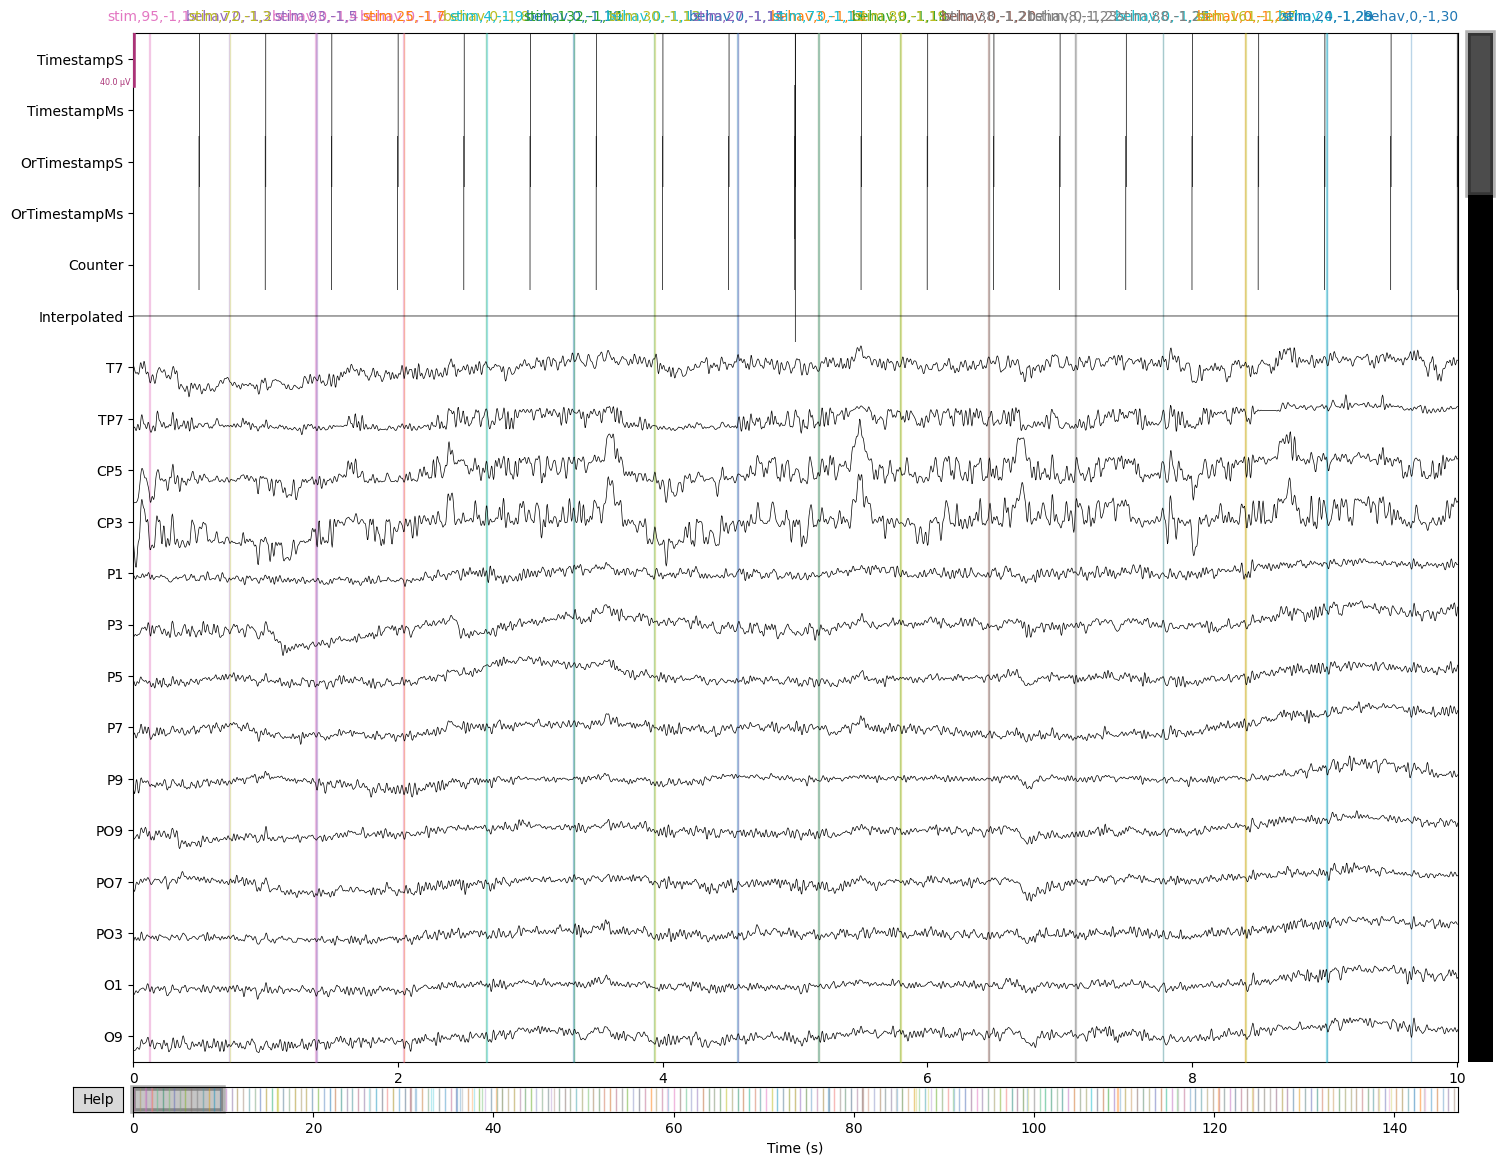

In [28]:
raw.plot()

In [29]:
events, event_id = mne.events_from_annotations(raw)
stim_event_ids = {key: value for key, value in event_id.items() if key.startswith('stim')}
epochs = mne.Epochs(raw, events, event_id=stim_event_ids, tmin=-0.05, tmax=0.60, preload=True)


Used Annotations descriptions: ['behav,0,-1,10', 'behav,0,-1,101', 'behav,0,-1,105', 'behav,0,-1,107', 'behav,0,-1,109', 'behav,0,-1,111', 'behav,0,-1,115', 'behav,0,-1,119', 'behav,0,-1,12', 'behav,0,-1,123', 'behav,0,-1,125', 'behav,0,-1,127', 'behav,0,-1,129', 'behav,0,-1,131', 'behav,0,-1,133', 'behav,0,-1,135', 'behav,0,-1,137', 'behav,0,-1,139', 'behav,0,-1,14', 'behav,0,-1,141', 'behav,0,-1,143', 'behav,0,-1,147', 'behav,0,-1,149', 'behav,0,-1,151', 'behav,0,-1,153', 'behav,0,-1,155', 'behav,0,-1,157', 'behav,0,-1,159', 'behav,0,-1,16', 'behav,0,-1,161', 'behav,0,-1,163', 'behav,0,-1,165', 'behav,0,-1,167', 'behav,0,-1,169', 'behav,0,-1,171', 'behav,0,-1,173', 'behav,0,-1,175', 'behav,0,-1,179', 'behav,0,-1,18', 'behav,0,-1,181', 'behav,0,-1,183', 'behav,0,-1,187', 'behav,0,-1,189', 'behav,0,-1,191', 'behav,0,-1,193', 'behav,0,-1,195', 'behav,0,-1,197', 'behav,0,-1,199', 'behav,0,-1,2', 'behav,0,-1,20', 'behav,0,-1,201', 'behav,0,-1,203', 'behav,0,-1,205', 'behav,0,-1,207', 'beh

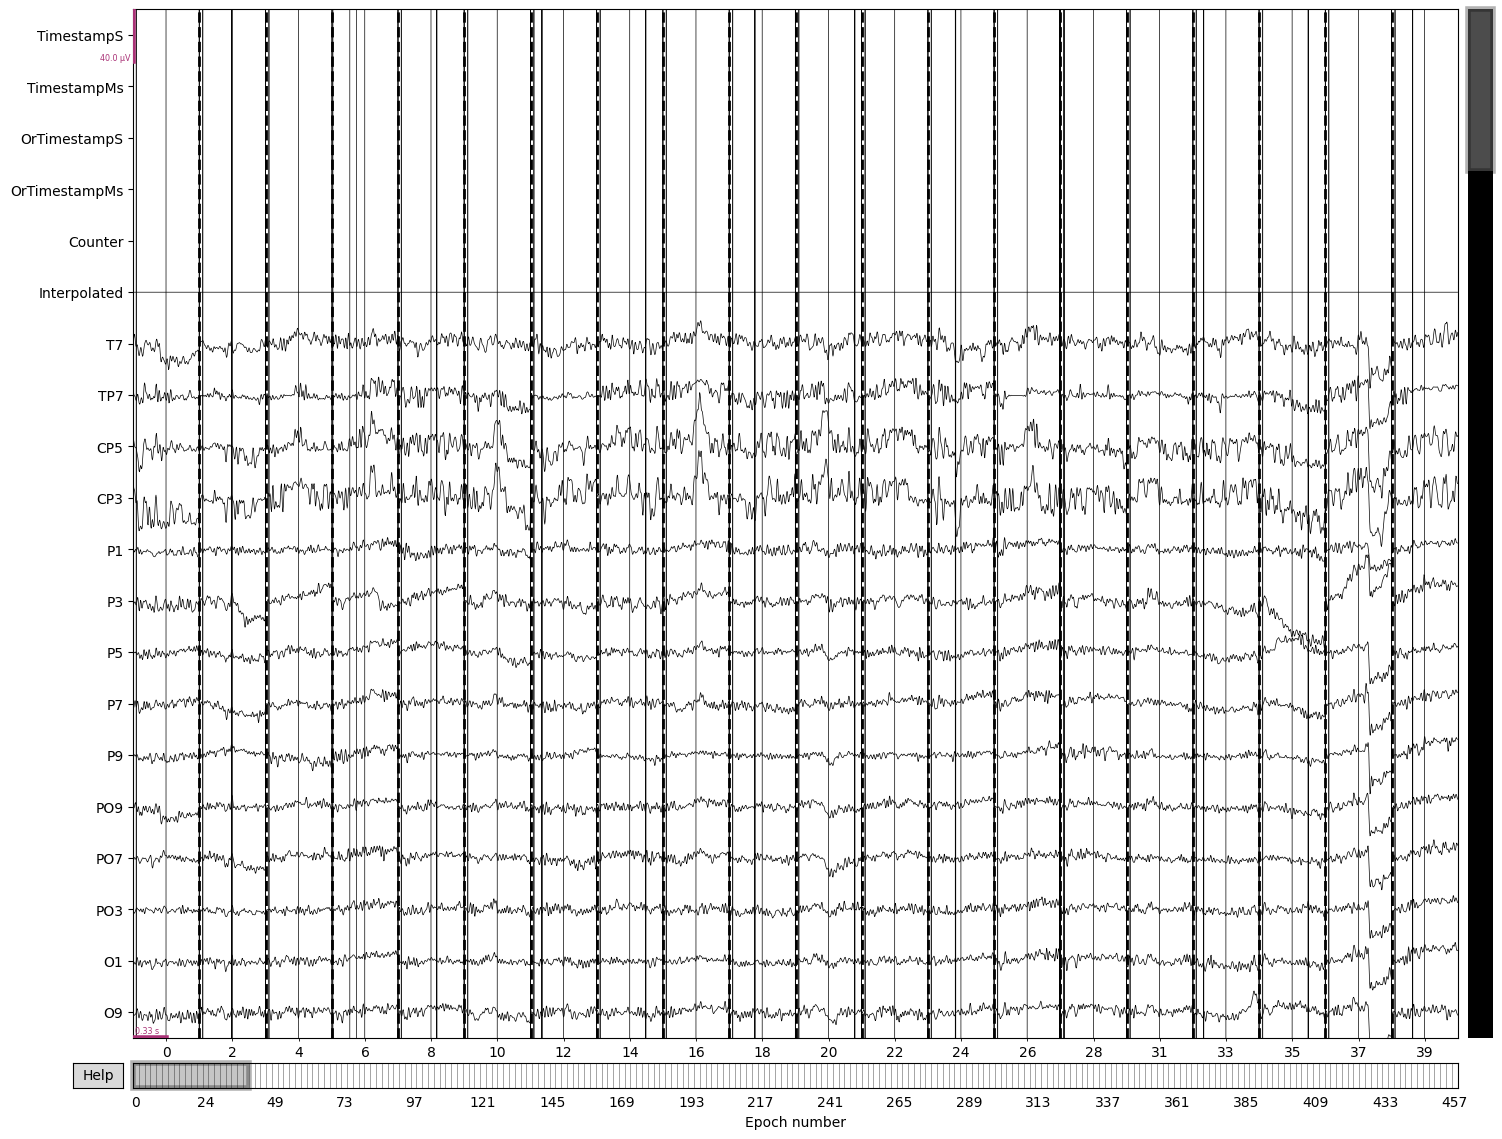

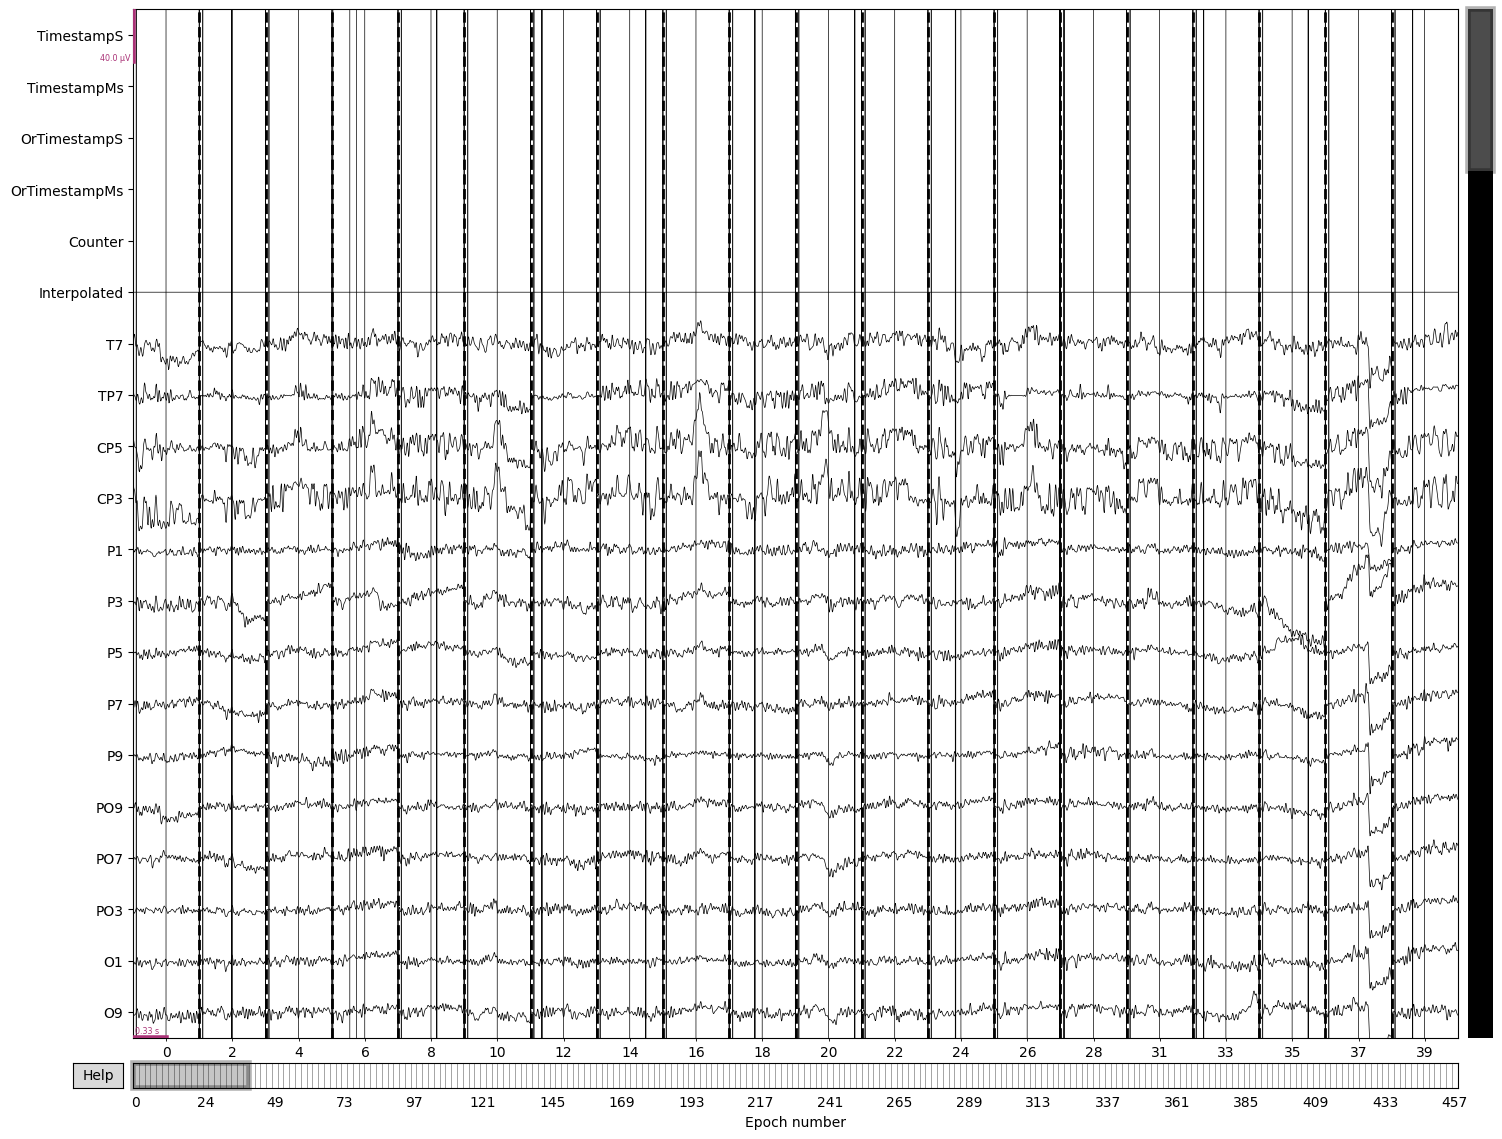

In [30]:
epochs.plot()

In [31]:
print("Channels:", raw.ch_names)

Channels: ['TimestampS', 'TimestampMs', 'OrTimestampS', 'OrTimestampMs', 'Counter', 'Interpolated', 'T7', 'TP7', 'CP5', 'CP3', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO9', 'PO7', 'PO3', 'O1', 'O9', 'Pz', 'POz', 'Oz', 'Iz', 'O10', 'O2', 'PO4', 'PO8', 'PO10', 'P10', 'P8', 'P6', 'P4', 'P2', 'CP4', 'CP6', 'TP8', 'T8', 'RawCq', 'Battery', 'BatteryPercent', 'FwBufferSize', 'FwClockTime', 'MarkerHardware', 'CQ.T7', 'CQ.TP7', 'CQ.CP5', 'CQ.CP3', 'CQ.P1', 'CQ.P3', 'CQ.P5', 'CQ.P7', 'CQ.P9', 'CQ.PO9', 'CQ.PO7', 'CQ.PO3', 'CQ.O1', 'CQ.O9', 'CQ.Pz', 'CQ.POz', 'CQ.Oz', 'CQ.Iz', 'CQ.O10', 'CQ.O2', 'CQ.PO4', 'CQ.PO8', 'CQ.PO10', 'CQ.P10', 'CQ.P8', 'CQ.P6', 'CQ.P4', 'CQ.P2', 'CQ.CP4', 'CQ.CP6', 'CQ.TP8', 'CQ.T8', 'CQ.Overall', 'EQ.SampleRateQua', 'EQ.OVERALL', 'EQ.T7', 'EQ.TP7', 'EQ.CP5', 'EQ.CP3', 'EQ.P1', 'EQ.P3', 'EQ.P5', 'EQ.P7', 'EQ.P9', 'EQ.PO9', 'EQ.PO7', 'EQ.PO3', 'EQ.O1', 'EQ.O9', 'EQ.Pz', 'EQ.POz', 'EQ.Oz', 'EQ.Iz', 'EQ.O10', 'EQ.O2', 'EQ.PO4', 'EQ.PO8', 'EQ.PO10', 'EQ.P10', 'EQ.P8', 'EQ.P6', 'EQ.P4